# Models for learning word embeddings


In [76]:
import pandas as pd

load_model = 'fasttext_titles_speeches_spacy_mincount20_window2_size300_alpha0.03_minalpha0.0007_negative20_workers10.model' # model_name
model_name = 'fasttext'
#model_name = 'word2vec'


In [77]:
if model_name == 'fasttext':
    from gensim.models import FastText as Model
elif model_name == 'word2vec':
    from gensim.models import Word2Vec as Model
else:
    raise Exception("Non allowed parameter for model.")

In [78]:
model = Model.load(load_model)

In [79]:
# Make model more memory-efficient
model.init_sims(replace=True)

# Evaluating the model

In [80]:
tasks = pd.read_excel("../evaluation/analogical-reasoning-tasks.xlsx")
tasks.head()

,pair1_1,pair1_2,pair2_1,pair2_2
0,Matti Vanhanen,pääministeri,Jyrki Katainen,valtiovarainministeri
1,Matti Vanhanen,pääministeri,Tuija Brax,oikeusministeri
2,Matti Vanhanen,pääministeri,Anne Holmlund,sisäasiainministeri
3,Matti Vanhanen,pääministeri,Jyri Häkämies,puolustusministeri
4,Matti Vanhanen,pääministeri,Mari Kivimies,hallinto- ja kuntaministeri


In [81]:
correct = 0
for row in range(len(tasks)):
    print(f"Result from: {tasks.pair1_1.iloc[row]} - {tasks.pair1_2.iloc[row]} + {tasks.pair2_1.iloc[row]}")
    result = model.wv.most_similar(positive=[tasks.pair1_1.iloc[row], tasks.pair2_1.iloc[row]], negative = [tasks.pair1_2.iloc[row]], topn=1)
    print(f"is: {result[0][0]}")
    print(f"Right answer = {tasks.pair2_2.iloc[row]}")
    if result[0][0] == tasks.pair2_2.iloc[row]:
        correct += 1

accuracy = correct/len(tasks)
accuracy

Result from: Matti Vanhanen - pääministeri + Jyrki Katainen
is: pyhä
Right answer = valtiovarainministeri
Result from: Matti Vanhanen - pääministeri + Tuija Brax
is: pyhä
Right answer = oikeusministeri
Result from: Matti Vanhanen - pääministeri + Anne Holmlund
is: c
Right answer = sisäasiainministeri
Result from: Matti Vanhanen - pääministeri + Jyri Häkämies
is: joiden_mukaan
Right answer = puolustusministeri
Result from: Matti Vanhanen - pääministeri + Mari Kivimies
is: maksuton
Right answer = hallinto- ja kuntaministeri
Result from: Matti Vanhanen - pääministeri + Sari Sarkomaa
is: ulotetaan
Right answer = opetusministeri
Result from: Matti Vanhanen - pääministeri + Sirkka-Liisa Anttila
is: kuljetetaan
Right answer = maa- ja metsätalousministeri
Result from: Matti Vanhanen - pääministeri + Anu Vehviläinen
is: irrotetaan
Right answer = liikenneministeri
Result from: Matti Vanhanen - pääministeri + Suvi Lindén
is: ulotetaan
Right answer = viestintäministeri
Result from: Matti Vanhanen 

0.0

# Exploring the model

## Most similar to:

In [82]:
def format_res(res_list):
    print(" \\\\ \n".join([" & ".join([str(round(i, 5)) if type(i) == float else i for i in list(item)])for item in res_list]))

In [83]:
model.wv.most_similar(positive=["keskusta"],topn=5)

[('keskustakin', 0.7921044826507568),
 ('keskustasta', 0.7911267876625061),
 ('keskustaan', 0.7771062254905701),
 ('keskustapuolue', 0.7537404298782349),
 ('keskustalta', 0.7451156377792358)]

In [84]:
model.wv.most_similar(positive=["kokoomus"],topn=5)

[('kokoomusta', 0.7505878806114197),
 ('kokoomuslainen', 0.6780723333358765),
 ('kokoomuslaista', 0.6766822338104248),
 ('kokoomuslaiset', 0.6128849387168884),
 ('kokoomuslaisen', 0.6127287745475769)]

In [85]:
model.wv.most_similar(positive=["matti_vanhanen"],topn=5)

[('matti_vanhasen', 0.7726650238037109),
 ('vanhanen', 0.7325457334518433),
 ('matti', 0.5979841947555542),
 ('matti_saarinen', 0.588952898979187),
 ('mattila', 0.558089554309845)]

## Similarities:

In [86]:
model.wv.similarity("vanhanen", 'katainen')

0.43604982

In [87]:
model.wv.similarity('vanhanen', 'timo_soini')

0.2600231

## Odd-One-Out:

Here, we ask our model to give us the word that does not belong to the list!

In [88]:
model.wv.doesnt_match(['keskusta', 'kokoomus', 'perus_suomalaiset'])

'perus_suomalaiset'

### t-SNE visualizations:

In [89]:
from plotting import TSNE_scatterplot

## 10 Most similar words vs. 10 Most dissimilar


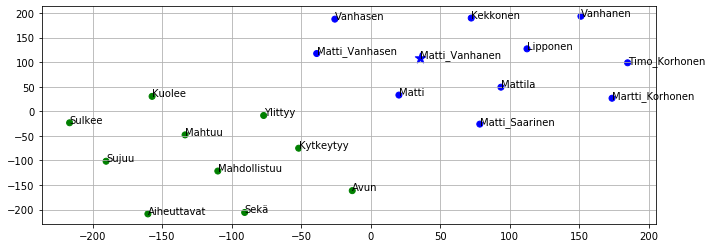

In [90]:
TSNE_scatterplot(model, 'matti_vanhanen', "keskusta", save=False)